# Notebook for 3D drawing

#Import numpy and pyvista packages

In [1]:
import pyvista as pv
import numpy as np
from pyvista import set_plot_theme
set_plot_theme("night")

#Input data values

In [2]:
L_fl=10
L_v=10
E_pl=1
eps=0.5

#Create nodes

In [3]:
v=np.array([[L_fl/2,L_fl/2,-L_v*eps],
           [L_fl/2,-L_fl/2,-L_v*eps],
           [-L_fl/2,-L_fl/2,-L_v*eps],
           [-L_fl/2,L_fl/2,-L_v*eps],
           [L_fl/2,L_fl/2,L_v*(1-eps)],
           [L_fl/2,-L_fl/2,L_v*(1-eps)],
           [-L_fl/2,-L_fl/2,L_v*(1-eps)],
           [-L_fl/2,L_fl/2,L_v*(1-eps)],
           [((L_fl/2)+E_pl),((L_fl/2)+E_pl),L_v*(1-eps)],
           [((L_fl/2)+E_pl),-((L_fl/2)+E_pl),L_v*(1-eps)],
           [-((L_fl/2)+E_pl),-((L_fl/2)+E_pl),L_v*(1-eps)],
           [-((L_fl/2)+E_pl),((L_fl/2)+E_pl),L_v*(1-eps)],
           ])

#Create connections

In [4]:
f=np.hstack([[4, 0,1,2,3],
            [4, 0,4,5,1],
            [4, 1,5,6,2],
            [4, 2,6,7,3],
            [4, 0,4,7,3],
            [4, 8,9,10,11]]
          )

#Make plot

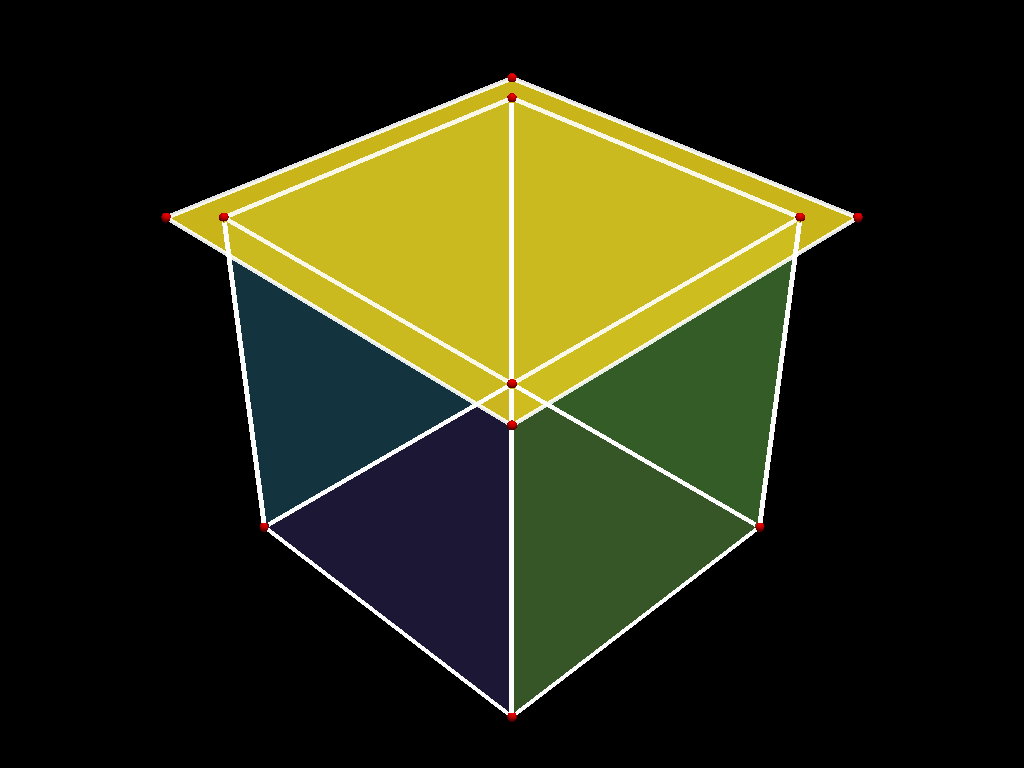

In [24]:
points = pv.PolyData(v)
surf=pv.PolyData(v,f)
p = pv.Plotter()
p.add_mesh(points, color="red",point_size=10,render_points_as_spheres=True)
p.add_mesh(surf, line_width=5,show_edges=True,scalars=np.arange(6), opacity=0.9)
p.show()
p.view_isometric()

#Make GIF file for animation

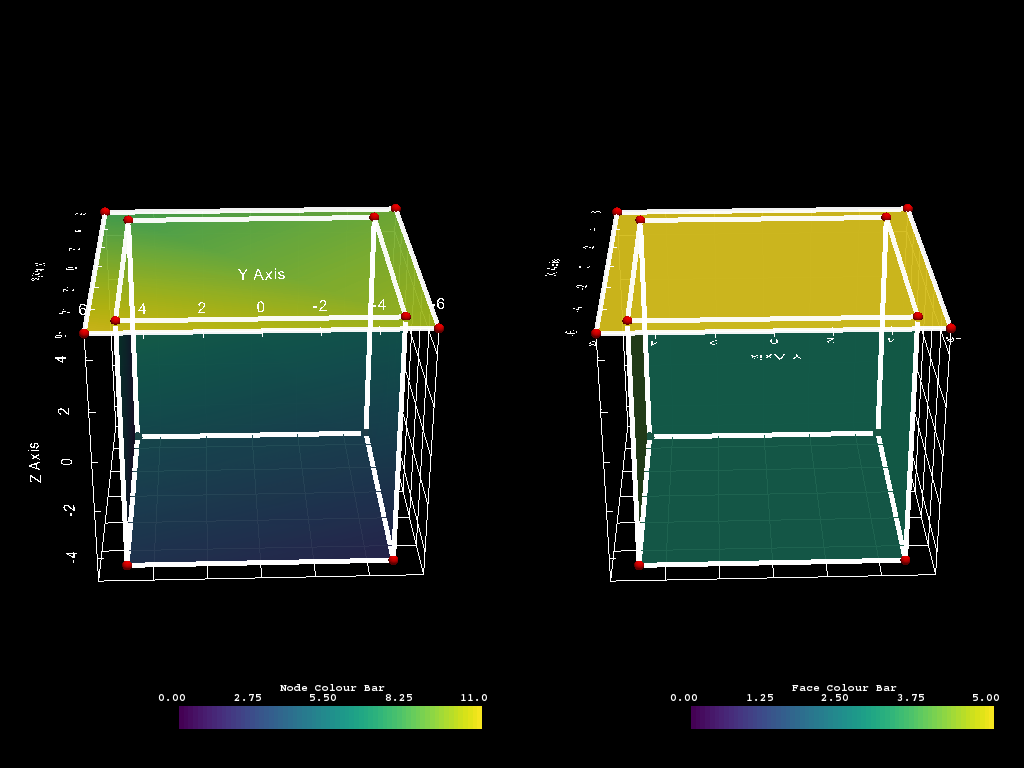

In [114]:
points = pv.PolyData(v)
surf=pv.PolyData(v,f)
surf.point_arrays['Node Colour Bar'] = np.arange(surf.n_points)
surf.cell_arrays['Face Colour Bar'] = np.arange(surf.n_cells)

p = pv.Plotter(shape=(1,2),notebook=0)
p.subplot(0,0)
p.add_mesh(points, color="red",point_size=10,render_points_as_spheres=True)
p.add_mesh(surf, line_width=5,show_edges=True,scalars='Node Colour Bar', opacity=0.95)
p.add_axes()
p.show_bounds(grid='front')
p.subplot(0,1)
p.add_mesh(points, color="red",point_size=10,render_points_as_spheres=True)
p.add_mesh(surf, line_width=5,show_edges=True,scalars='Face Colour Bar', opacity=0.95)
p.add_axes()
p.show_bounds(grid='front')

p.link_views()  # link all the views
# Set a camera position to all linked views
p.camera_position = [-1*np.cos(np.pi / 90.0), 1*np.sin(np.pi / 90.0), 0.5]

p.show(auto_close=False)
p.view_isometric()
p.open_gif("3d.gif")

# Update camera and write a frame for each updated position
nframe = 90
for i in range(nframe):
    p.camera_position = [
        -1*np.cos((i+1) * np.pi / 90.0), 1*np.sin((i+1) * np.pi / 90.0), 0.5
    ]
    p.write_frame()

# Close movie and delete object
p.close()

In [97]:
image = pv.read('F4.JPG')

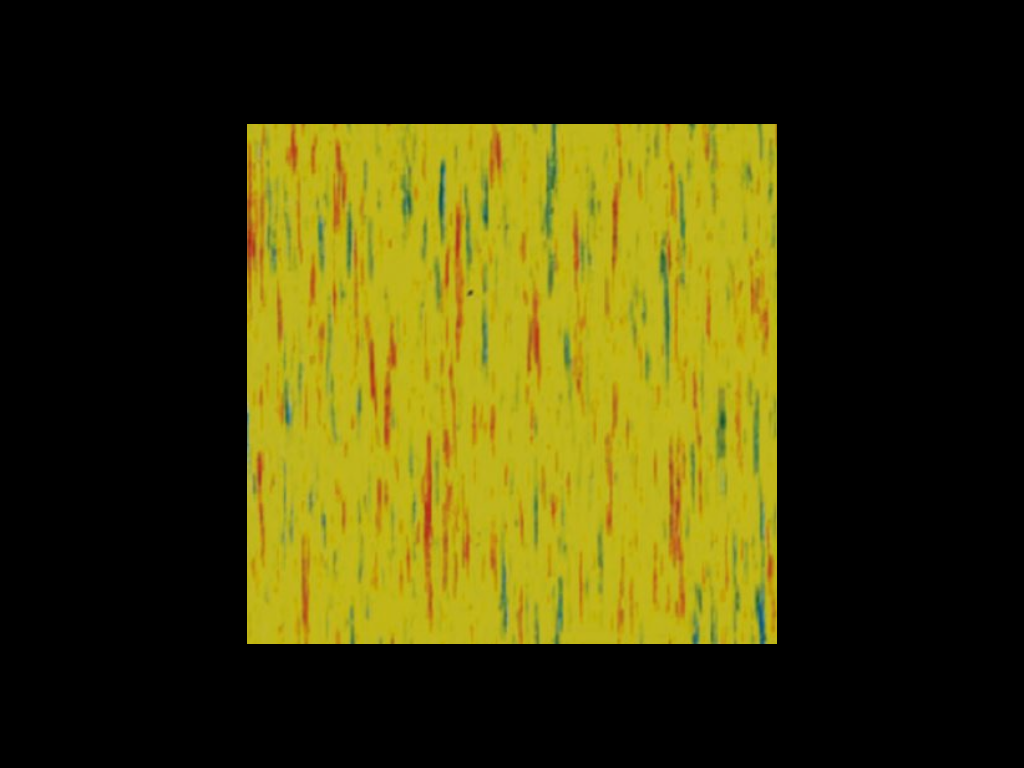

In [98]:
image.plot(rgb=True, cpos="xy")

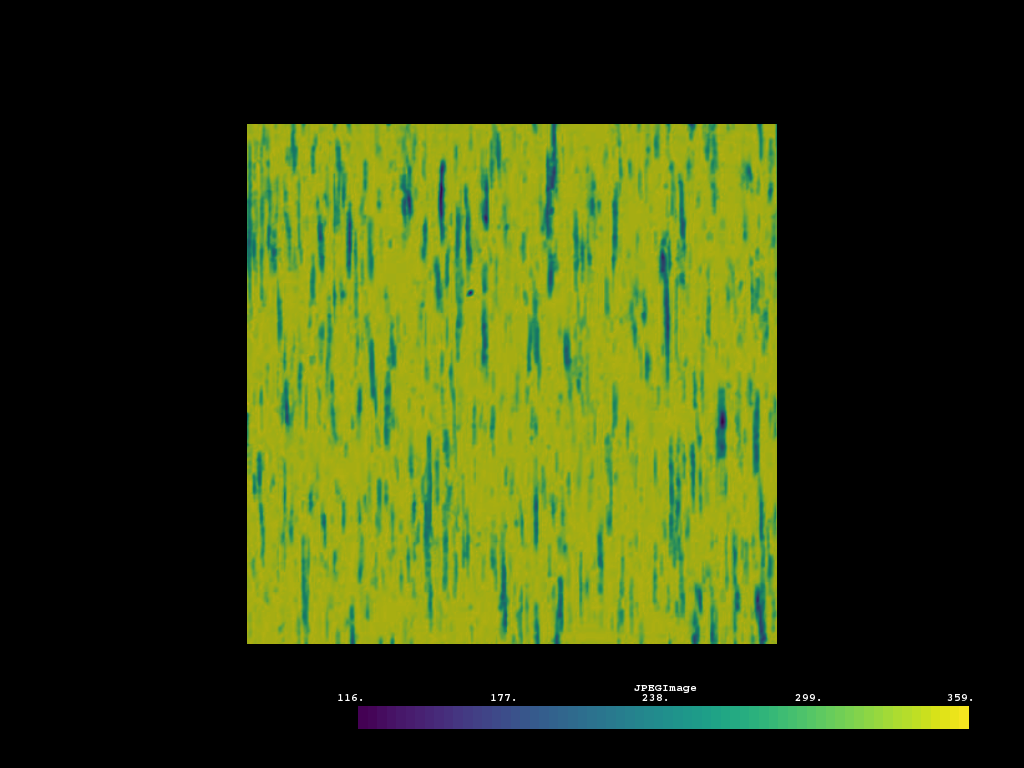

In [99]:
image.plot(cpos="xy")

In [100]:
tex = pv.read_texture('F4.JPG')

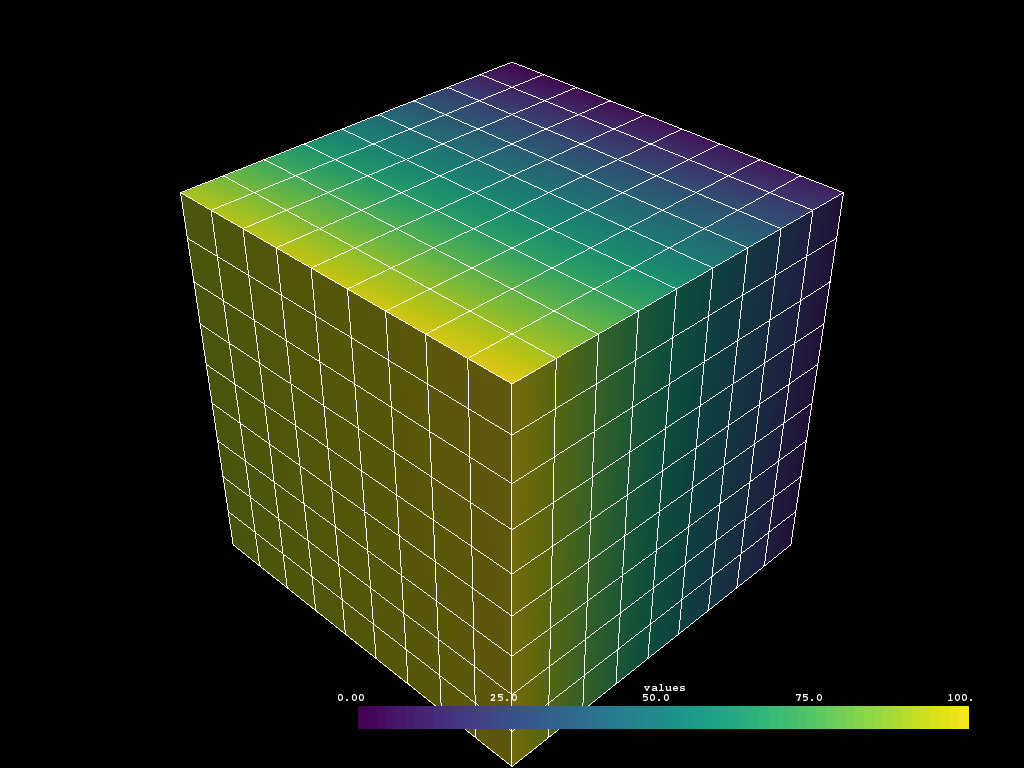

In [105]:
# Create the 3D NumPy array of spatially referenced data
# This is spatially referenced such that the grid is 20 by 5 by 10
#   (nx by ny by nz)
values = np.linspace(0, 100, 1000).reshape((10, 10, 10))
values.shape

# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape because we want to inject our values on the
#   POINT data
grid.dimensions = values.shape

# Edit the spatial reference
grid.origin = (100, 33, 55.6)  # The bottom left corner of the data set
grid.spacing = (10, 10, 10)  # These are the cell sizes along each axis

# Add the data values to the cell data
grid.point_arrays["values"] = values.flatten(order="F")  # Flatten the array!

# Now plot the grid!
grid.plot(show_edges=True)

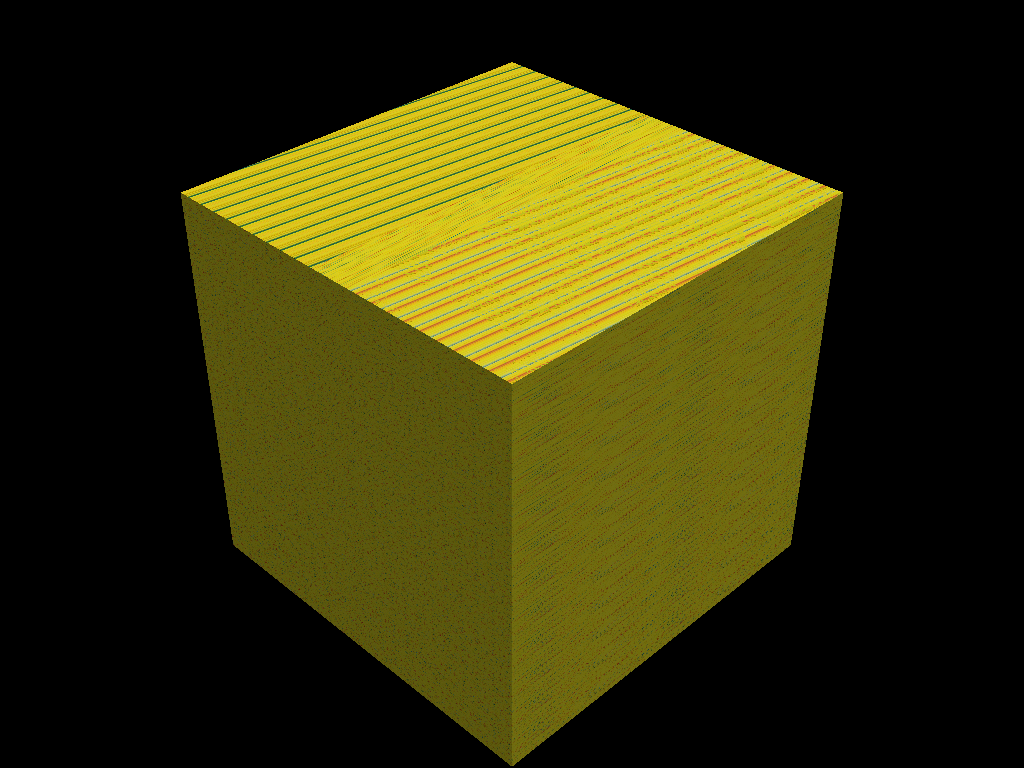

In [112]:
axial_num_puppies = 12
xc = np.linspace(0, axial_num_puppies, 50)
yc = np.linspace(0, axial_num_puppies, 20)
xxc, yyc = np.meshgrid(xc, yc)
p_coords = np.c_[yyc.ravel(), xxc.ravel()]
grid.t_coords = p_coords
grid.plot(texture=tex)